In [56]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 

In [57]:
dfx = pd.read_csv('weightedX.csv')
dfy = pd.read_csv('weightedY.csv')

In [58]:
X = dfx.values
Y = dfy.values

In [59]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


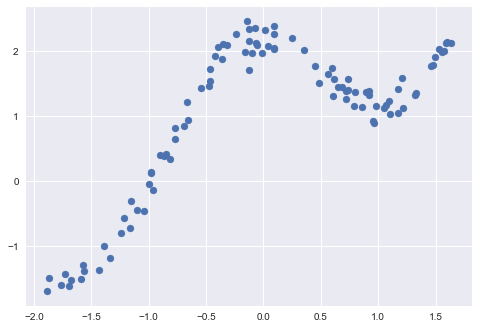

In [60]:
# Normalise 

u = X.mean()
std = X.std()

X = (X-u)/std
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

Find out waighted daigonal matrix

In [61]:
np.eye(5) # this is a numpy daigonal array

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [62]:
# to convert it to matrix

np.mat(np.eye(5))

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [63]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
     
    for i in range (M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
        
    return W



In [64]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

W = getW(-1, X, 0.5)

print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


# Make Predictions 

In [65]:
def predict(X,Y,query_x,tau):
    # add a column of ones 
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    #print(X_.shape)
    #print(X_[:5,:5])
    
    qx = np.mat([query_x,1])
    
    W  = getW(qx,X,tau)
    
    #print(W.shape)
    
    # theta  = `(X'WX)inv * X'WY`
    
    theta = np.linalg.pinv(X_.T*(W*X_)) * (X_.T*(W*Y))
    pred = np.dot(qx,theta)
    return theta,pred

In [66]:
theta,pred = predict(X,Y,1.0,1.0)

Visualise Predction and Effect of tau

In [69]:
def plotpred(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color = 'red')
    plt.show()

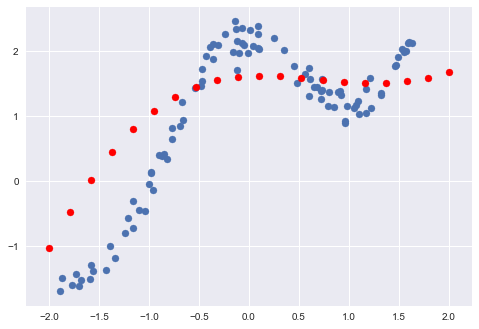

In [70]:
plotpred(1)

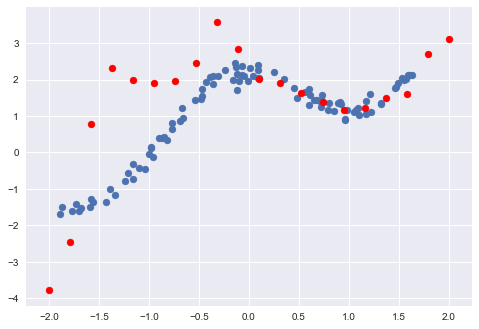

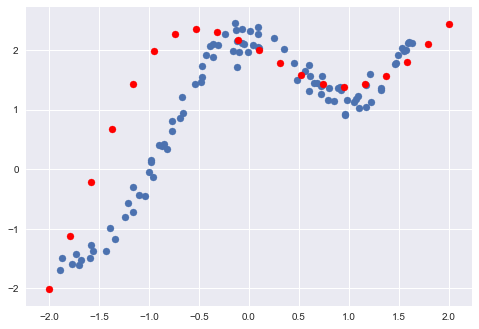

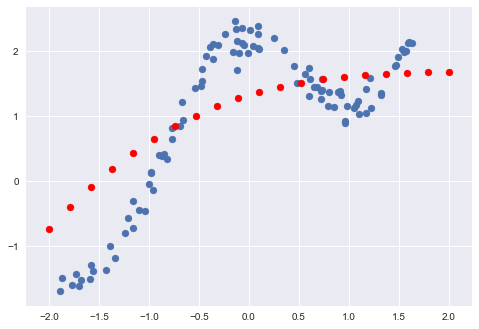

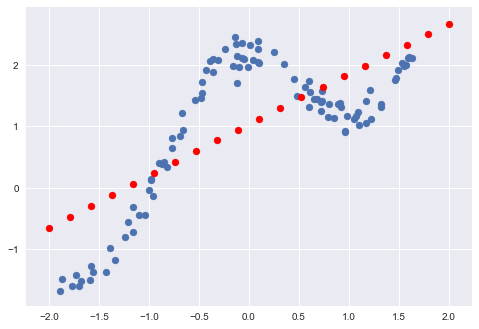

In [71]:
taus = [0.1,0.5,1.5,10]

for t in taus:
    plotpred(t) 